In [121]:
print('only ws from now on')

only ws from now on


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 330.3 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/126.0 kB 787.7 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 925.7 kB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
print('done')

done


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\besid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Load the prepared datasets
business = pd.read_csv('C:/Users/besid/OneDrive/Desktop/on campus internship/machine learning/yelpproject/data/business_prepared.csv')
review = pd.read_csv('C:/Users/besid/OneDrive/Desktop/on campus internship/machine learning/yelpproject/data/review_prepared.csv')
user = pd.read_csv('C:/Users/besid/OneDrive/Desktop/on campus internship/machine learning/yelpproject/data/user_prepared.csv')


## Businesses Dataset

In [34]:

# Display basic information about each dataset
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11360 entries, 0 to 11359
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11360 non-null  int64  
 1   business_categories    11360 non-null  object 
 2   business_city          11360 non-null  object 
 3   business_full_address  11360 non-null  object 
 4   business_id            11360 non-null  object 
 5   business_latitude      11360 non-null  float64
 6   business_longitude     11360 non-null  float64
 7   business_name          11360 non-null  object 
 8   business_open          11360 non-null  bool   
 9   business_review_count  11360 non-null  int64  
 10  business_stars         11360 non-null  float64
 11  business_state         11360 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 987.5+ KB


In [35]:
business.head()

,Unnamed: 0,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state
0,0,Accountants; Professional Services; Tax Servic...,Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",rncjoVoEFUJGCUoC1JgnUA,33.581867,-112.241596,Peoria Income Tax Service,True,3,5.0,AZ
1,1,Sporting Goods; Bikes; Shopping,Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",0FNFSzCFP_rGUoJx8W7tJg,33.604054,-112.105933,Bike Doctor,True,5,5.0,AZ
2,2,Food; Grocery,Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",usAsSV36QmUej8--yvN-dg,33.392210,-112.085377,Food City,True,5,3.5,AZ
3,3,Food; Bagels; Delis; Restaurants,Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",PzOqRohWw7F7YEPBz6AubA,33.712797,-112.200264,Hot Bagels & Deli,True,14,3.5,AZ
4,4,Women's Clothing; Fashion; Shopping,Glendale,The Americana at Brand\n869 Americana Way\nGle...,gtQzAiy7D-dPU8WzT3jX3Q,33.607766,-112.481632,Barney's New York Co-op,True,6,4.5,CA


In [36]:
business.columns

Index(['Unnamed: 0', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_open',
       'business_review_count', 'business_stars', 'business_state'],
      dtype='object')

In [37]:
business['business_categories'].value_counts()

business_categories
Mexican; Restaurants                                                            528
Pizza; Restaurants                                                              281
Hotels & Travel; Event Planning & Services; Hotels                              227
Food; Coffee & Tea                                                              225
Restaurants                                                                     202
                                                                               ... 
Bars; Food; Beer, Wine & Spirits; Wine Bars; Nightlife; Restaurants               1
Computers; Shopping; Home & Garden; Appliances                                    1
Bars; Music Venues; Arts & Entertainment; Dive Bars; Nightlife; Comedy Clubs      1
Bridal; Fashion; Shopping                                                         1
Cosmetology Schools; Specialty Schools; Education; Beauty & Spas                  1
Name: count, Length: 2060, dtype: int64

In [38]:
# most reviews / busisness are based phoenix
business['business_city'].value_counts()

business_city
Phoenix             4084
Scottsdale          2009
Tempe               1136
Mesa                 885
Chandler             855
Glendale             591
Gilbert              433
Peoria               264
Surprise             154
Avondale             127
Goodyear             124
Queen Creek           77
Cave Creek            62
Paradise Valley       57
Casa Grande           48
Fountain Hills        47
Apache Junction       45
Anthem                34
Maricopa              31
Buckeye               30
Sun City              27
Wickenburg            27
Litchfield Park       26
Tolleson              22
Laveen                21
Carefree              19
Gold Canyon           13
El Mirage             11
Gila Bend             10
Florence              10
Sun City West          8
Fort McDowell          7
San Tan Valley         6
Youngtown              6
Morristown             5
Higley                 5
Coolidge               5
Guadalupe              4
Sun Lakes              4
Ahwatukee  

In [39]:
business['business_open'].value_counts()

business_open
True     10145
False     1215
Name: count, dtype: int64

In [40]:
# 3rd data set or business has the most reviews / famous
business['business_review_count'].value_counts()

business_review_count
3      2447
4      1662
5      1016
6       828
7       567
       ... 
200       1
245       1
549       1
268       1
239       1
Name: count, Length: 293, dtype: int64

In [41]:
business['business_stars'].value_counts()

business_stars
4.0    2649
3.5    2606
4.5    1721
3.0    1493
5.0    1252
2.5     981
2.0     390
1.5     164
1.0     104
Name: count, dtype: int64

In [42]:
business['business_state'].value_counts()
# AZ: Arizona
# CA: California
# SC: South Carolina
# CO: Colorado

business_state
AZ    11357
CA        1
SC        1
CO        1
Name: count, dtype: int64

## Reviews Dataset

In [45]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229130 entries, 0 to 229129
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              229130 non-null  int64  
 1   business_categories     229130 non-null  object 
 2   business_city           229130 non-null  object 
 3   business_full_address   229130 non-null  object 
 4   business_id             229130 non-null  object 
 5   business_latitude       229130 non-null  float64
 6   business_longitude      229130 non-null  float64
 7   business_name           229130 non-null  object 
 8   business_open           229130 non-null  bool   
 9   business_review_count   229130 non-null  int64  
 10  business_stars          229130 non-null  float64
 11  business_state          229130 non-null  object 
 12  cool                    229130 non-null  int64  
 13  date                    229130 non-null  object 
 14  funny               

In [51]:
review.head()

,Unnamed: 0,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,...,reviewer_blank,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id
0,0,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,True,116,...,False,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,True,102,...,False,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,True,265,...,False,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,3,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,True,88,...,False,36,18,lindsey,31,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,4,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,True,5,...,False,8,3,Roger,28,32,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw


In [50]:
review.columns

Index(['Unnamed: 0', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_open',
       'business_review_count', 'business_stars', 'business_state', 'cool',
       'date', 'funny', 'review_id', 'reviewer_average_stars',
       'reviewer_blank', 'reviewer_cool', 'reviewer_funny', 'reviewer_name',
       'reviewer_review_count', 'reviewer_useful', 'stars', 'text', 'useful',
       'user_id'],
      dtype='object')

In [52]:
review['reviewer_average_stars'].value_counts()

reviewer_average_stars
0.00    13961
4.00     9431
5.00     8017
3.00     4023
3.67     4016
        ...  
1.61        1
1.43        1
1.36        1
2.07        1
1.82        1
Name: count, Length: 331, dtype: int64

In [ ]:
# On Yelp, users can mark reviews as "cool" if they find them 
# particularly helpful, interesting, or well-written

# 39,450 reviewers have received 0 "cool" votes

In [54]:
review['reviewer_cool'].value_counts()

reviewer_cool
0       39248
1       14963
2       10764
3        8291
4        6574
        ...  
3703        1
3902        1
710         1
2479        1
662         1
Name: count, Length: 1116, dtype: int64

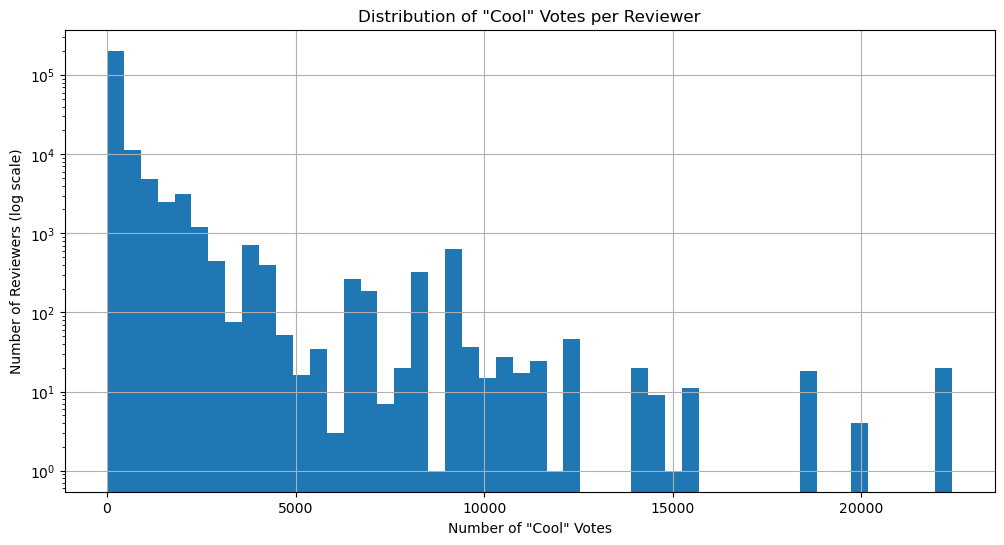

In [55]:
plt.figure(figsize=(12, 6))
review['reviewer_cool'].hist(bins=50, log=True)
plt.title('Distribution of "Cool" Votes per Reviewer')
plt.xlabel('Number of "Cool" Votes')
plt.ylabel('Number of Reviewers (log scale)')
plt.show()

In [58]:
print("Mean 'cool' votes per reviewer:", review['reviewer_cool'].mean())

Mean 'cool' votes per reviewer: 246.41569414742722


### Analyze if there's a correlation between "cool" votes and star ratings:

Correlation between 'cool' votes and star rating: -0.004295222041795148


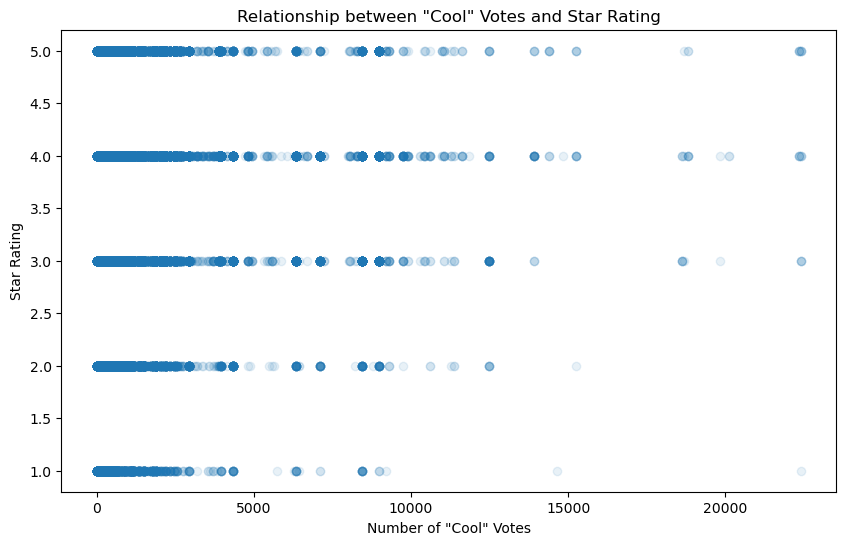

In [59]:
correlation = review['reviewer_cool'].corr(review['stars'])
print(f"Correlation between 'cool' votes and star rating: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(review['reviewer_cool'], review['stars'], alpha=0.1)
plt.title('Relationship between "Cool" Votes and Star Rating')
plt.xlabel('Number of "Cool" Votes')
plt.ylabel('Star Rating')
plt.show()

### we can see if reviewers with more "cool" votes tend to write longer reviews:

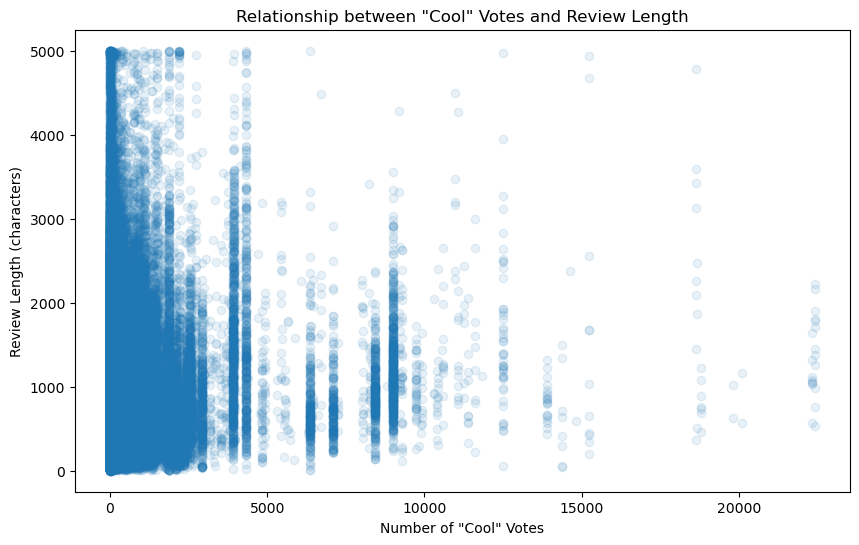

In [60]:
review['review_length'] = review['text'].str.len()
plt.figure(figsize=(10, 6))
plt.scatter(review['reviewer_cool'], review['review_length'], alpha=0.1)
plt.title('Relationship between "Cool" Votes and Review Length')
plt.xlabel('Number of "Cool" Votes')
plt.ylabel('Review Length (characters)')
plt.show()

In [61]:
# so from plot we can say 500 to 2000 length reviews (characters) 
# are more likely to get more cool votes

In [63]:
review['stars'].value_counts()

stars
4    79705
5    75912
3    35268
2    20897
1    17348
Name: count, dtype: int64

In [72]:
review['text'][9]

'Nobuo shows his unique talents with everything on the menu. Carefully crafted features with much to drink. Start with the pork belly buns and a stout. Then go on until you can no longer.'

In [73]:
review['reviewer_blank'].value_counts()

reviewer_blank
False    215170
True      13960
Name: count, dtype: int64

## users dataset

In [74]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43873 entries, 0 to 43872
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              43873 non-null  int64  
 1   reviewer_average_stars  43873 non-null  float64
 2   reviewer_cool           43873 non-null  int64  
 3   reviewer_funny          43873 non-null  int64  
 4   reviewer_name           43873 non-null  object 
 5   reviewer_review_count   43873 non-null  int64  
 6   reviewer_useful         43873 non-null  int64  
 7   user_id                 43873 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.7+ MB


In [75]:
user.head()

,Unnamed: 0,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,user_id
0,0,5.0,0,0,Jim,6,7,CR2y7yEm4X035ZMzrTtN9Q
1,1,1.0,0,0,Kelle,2,1,_9GXoHhdxc30ujPaQwh6Ew
2,2,5.0,0,0,Stephanie,2,1,8mM-nqxjg6pT04kwcjMbsw
3,3,5.0,0,0,T,2,2,Ch6CdTR2IVaVANr-RglMOg
4,4,1.0,0,0,Beth,1,0,NZrLmHRyiHmyT1JrfzkCOA


In [76]:
# Similar to "cool", 
# users can mark reviews as "funny" if they find them humorous.
# Users can mark reviews as "useful" if they find them particularly helpful or informative.

# reviewer_review_count :
# The total number of reviews this reviewer has written on Yelp.
# indicator of how active or experienced the reviewer is on the platform.

# EDA and Data Cleaning

### i have removed the following features from the datasets..

     column_a - contains the index
     business_blank - contains only the False boolean value of unknown       
     business_neighborhoods - contains all missing values
     business_type - contains only one value 'business'
     reviewer_type - has only one value 'user' which is deemed unnecessary
     type - contains only one value 'review' which is deemed unnecess      
     business_location - contains already existing information on   
     longitude/latitude)

## Missing values
### Business Dataset
    -All missing values have been removed on the business_categories column

In [78]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', business.isnull().values.sum())
print('Percent of missing values per feature: ') 
business.isnull().sum() * 100 / len(business)

Number of missing values:  0
Percent of missing values per feature: 


Unnamed: 0               0.0
business_categories      0.0
business_city            0.0
business_full_address    0.0
business_id              0.0
business_latitude        0.0
business_longitude       0.0
business_name            0.0
business_open            0.0
business_review_count    0.0
business_stars           0.0
business_state           0.0
dtype: float64

In [81]:
#removing all missing values in categories
business.dropna(subset = ['business_categories'], inplace=True)

In [82]:
#resetting the index
business.reset_index(drop=True, inplace=True)
business.head()

,Unnamed: 0,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state
0,0,Accountants; Professional Services; Tax Servic...,Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",rncjoVoEFUJGCUoC1JgnUA,33.581867,-112.241596,Peoria Income Tax Service,True,3,5.0,AZ
1,1,Sporting Goods; Bikes; Shopping,Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",0FNFSzCFP_rGUoJx8W7tJg,33.604054,-112.105933,Bike Doctor,True,5,5.0,AZ
2,2,Food; Grocery,Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",usAsSV36QmUej8--yvN-dg,33.392210,-112.085377,Food City,True,5,3.5,AZ
3,3,Food; Bagels; Delis; Restaurants,Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",PzOqRohWw7F7YEPBz6AubA,33.712797,-112.200264,Hot Bagels & Deli,True,14,3.5,AZ
4,4,Women's Clothing; Fashion; Shopping,Glendale,The Americana at Brand\n869 Americana Way\nGle...,gtQzAiy7D-dPU8WzT3jX3Q,33.607766,-112.481632,Barney's New York Co-op,True,6,4.5,CA


## Review Dataset

In [83]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', review.isnull().values.sum())
print('Percent of missing values per feature: ') 
review.isnull().sum() * 100 / len(review)

Number of missing values:  13972
Percent of missing values per feature: 


Unnamed: 0                0.000000
business_categories       0.000000
business_city             0.000000
business_full_address     0.000000
business_id               0.000000
business_latitude         0.000000
business_longitude        0.000000
business_name             0.000000
business_open             0.000000
business_review_count     0.000000
business_stars            0.000000
business_state            0.000000
cool                      0.000000
date                      0.000000
funny                     0.000000
review_id                 0.000000
reviewer_average_stars    0.000000
reviewer_blank            0.000000
reviewer_cool             0.000000
reviewer_funny            0.000000
reviewer_name             6.092611
reviewer_review_count     0.000000
reviewer_useful           0.000000
stars                     0.000000
text                      0.002619
useful                    0.000000
user_id                   0.000000
review_length             0.002619
dtype: float64

In [88]:
#removing all missing values in categories
review.dropna(subset = ['business_categories'], inplace=True)

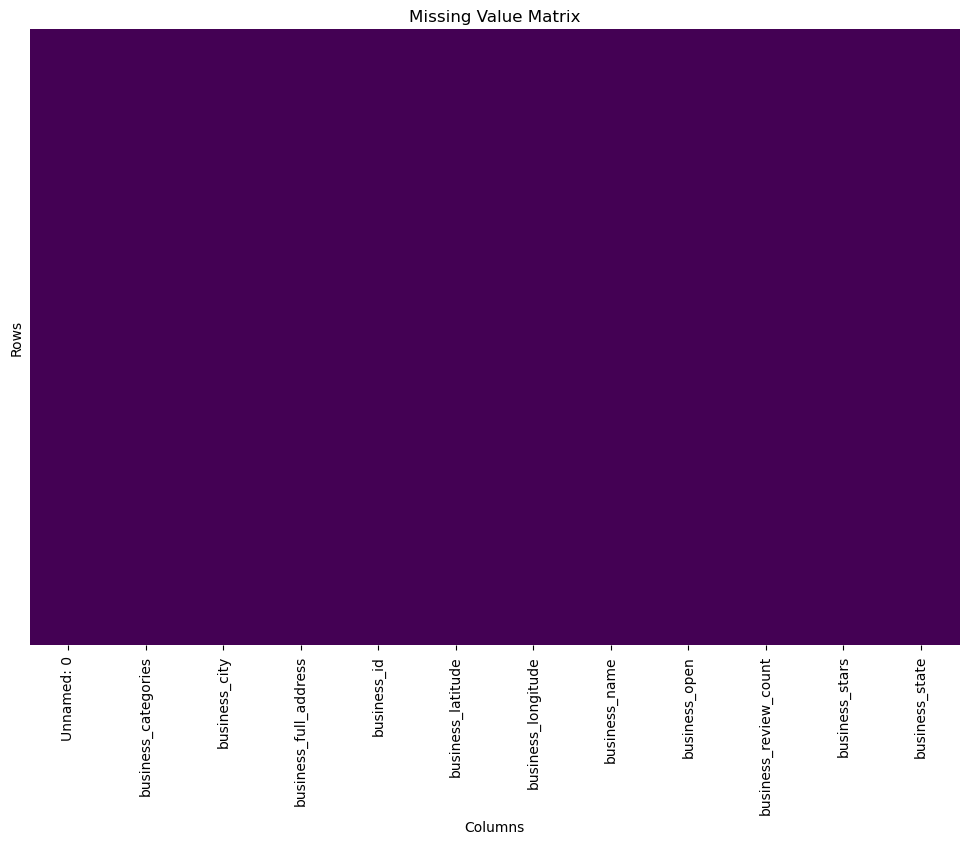

In [89]:
# Create a boolean mask of missing values
missing_mask = business.isnull()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_mask, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [90]:
#resetting the index
review.reset_index(drop=True, inplace=True)
review.head()

,Unnamed: 0,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,review_length
0,0,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,True,116,...,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q,889.0
1,1,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,True,102,...,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ,1345.0
2,2,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,True,265,...,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg,76.0
3,3,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,True,88,...,36,18,lindsey,31,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg,419.0
4,4,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,True,5,...,8,3,Roger,28,32,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw,469.0


## User Dataset

In [91]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', user.isnull().values.sum())
print('Percent of missing values per feature: ') 
user.isnull().sum() * 100 / len(user)

Number of missing values:  0
Percent of missing values per feature: 


Unnamed: 0                0.0
reviewer_average_stars    0.0
reviewer_cool             0.0
reviewer_funny            0.0
reviewer_name             0.0
reviewer_review_count     0.0
reviewer_useful           0.0
user_id                   0.0
dtype: float64

In [99]:
#checking for duplicate rows
print(len(business) - len(business.drop_duplicates()))

0


In [100]:
#checking for duplicate rows
len(review) - len(review.drop_duplicates())

0

In [101]:
#checking for duplicate rows
print(len(user) - len(user.drop_duplicates()))

0


There were no duplicate rows detected in the dataset

## Removing unnecessary features
### Business Dataset
  -dropping unnecessary columns in the business dataset

In [105]:
# business.drop(columns=['column_a', 
#                        'business_neighborhoods', 
#                        'business_location', 
#                        'business_type'], 
#               inplace=True)

In [106]:
#resetting the index
business.reset_index(drop=True, inplace=True)
business.head()

,Unnamed: 0,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state
0,0,Accountants; Professional Services; Tax Servic...,Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",rncjoVoEFUJGCUoC1JgnUA,33.581867,-112.241596,Peoria Income Tax Service,True,3,5.0,AZ
1,1,Sporting Goods; Bikes; Shopping,Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",0FNFSzCFP_rGUoJx8W7tJg,33.604054,-112.105933,Bike Doctor,True,5,5.0,AZ
2,2,Food; Grocery,Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",usAsSV36QmUej8--yvN-dg,33.392210,-112.085377,Food City,True,5,3.5,AZ
3,3,Food; Bagels; Delis; Restaurants,Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",PzOqRohWw7F7YEPBz6AubA,33.712797,-112.200264,Hot Bagels & Deli,True,14,3.5,AZ
4,4,Women's Clothing; Fashion; Shopping,Glendale,The Americana at Brand\n869 Americana Way\nGle...,gtQzAiy7D-dPU8WzT3jX3Q,33.607766,-112.481632,Barney's New York Co-op,True,6,4.5,CA


In [107]:
print('Number of missing values: ', business.isnull().values.sum())
print('Data lenght: ', len(business))

Number of missing values:  0
Data lenght:  11360


## Review Dataset

In [111]:

#dropping unnecessary columns in the review dataset

# review.drop(columns=['column_a', 
#                      'business_blank', 
#                      'business_neighborhoods',
#                      'business_type',
#                      'reviewer_type', 
#                      'type', 
#                      'business_location'], 
#             inplace=True)

In [112]:
#resetting the index in the review dataset
review.reset_index(drop=True, inplace=True)
review.head()

,Unnamed: 0,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,review_length
0,0,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,True,116,...,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q,889.0
1,1,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,True,102,...,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ,1345.0
2,2,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,True,265,...,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg,76.0
3,3,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,True,88,...,36,18,lindsey,31,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg,419.0
4,4,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,True,5,...,8,3,Roger,28,32,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw,469.0


In [113]:
print('Number of missing values: ', review.isnull().values.sum())
print('Data lenght: ', len(review))

Number of missing values:  13972
Data lenght:  229130


## User Dataset

In [115]:
#dropping unnecessary columns in the user dataset
# user.drop(columns=['column_a', 'reviewer_type'], inplace=True)

#resetting the index in the user dataset
user.reset_index(drop=True, inplace=True)
user.head()

,Unnamed: 0,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,user_id
0,0,5.0,0,0,Jim,6,7,CR2y7yEm4X035ZMzrTtN9Q
1,1,1.0,0,0,Kelle,2,1,_9GXoHhdxc30ujPaQwh6Ew
2,2,5.0,0,0,Stephanie,2,1,8mM-nqxjg6pT04kwcjMbsw
3,3,5.0,0,0,T,2,2,Ch6CdTR2IVaVANr-RglMOg
4,4,1.0,0,0,Beth,1,0,NZrLmHRyiHmyT1JrfzkCOA


In [116]:
print('Number of missing values are: ', user.isnull().values.sum())
print('Data lenght: ', len(user))

Number of missing values are:  0
Data lenght:  43873


## Updating the data for further analysis

In [119]:
# Set the base path
base_path = 'C:/Users/besid/OneDrive/Desktop/on campus internship/machine learning/yelpproject/data/'

# Business dataset
business.to_csv(base_path + 'business_prepared.csv', index=False)

# Review dataset
review.to_csv(base_path + 'review_prepared.csv', index=False)

# User dataset
user.to_csv(base_path + 'user_prepared.csv', index=False)